<span style="font-size:10pt">Robotics & AI workshop @ PPU – June 2022 – Jean-Luc Charles (Jean-Luc.charles@ensam.eu) – CC BY-SA 4.0 – v1.0</span>

# Machine learning with tensorflow2 & keras

# Train/operate a Convolutional Neural Network (CNN) for the classification of handwritten digits images

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:14pt"> 
It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) for main Python projects: a PVE makes it possible to control for each project the versions of the Python interpreter and the "sensitive" modules (like tensorflow).</span></div>

All the notebooks in this directory must be loaded into a `jupyter notebook` launched in the PVE <b><span style="color: rgb(200, 151, 102);" >pyml</span></b> specially created for the workshop.<br>
They must be worked in this order:
- `ML1_MNIST.ipynb`: check that the <b><span style="color: rgb(200, 151, 102);">pyml</span></b> EVP is fully operationnal, load and use the data from the MNIST database (images and labels).
- `ML2_DNN.ipynb`: build a Dense Neural Network, train it with data from the MNIST and evaluate its performance.
- `ML3_DNN_ipynb`: re-load a trained DNN and evaluate its performnce with MNIST test data.
- `ML4_CNN.ipynb`: build a Convolutional Neural Network, train it with the MNIST database, ebvaluate its performance and use it with test data.

### Targeted learning objectives:
- Learn how a convolutional neural network works.
- Know how to build a Convolutional Neural Network (CNN) using the **tendorflow** and **keras** modules.
- Know how to train a CNN to classify MNIST images.
- Knowing how to use the trained network.

# A/ Convolutional Neural Networks (CNN)

## General principles

Convolutional Neural Networks (CNN) offer particularly effective structures for analyzing the content of images. For this, the CNN implement specific processing and architecture:
- the extraction of features from images using **convolutional filters**,
- the reduction with **pooling filters** of the amount of information generated by the numerous convolution filters,
- an architecture that stacks "convolution > activation > pooling..." layers responsible for extracting the features of the image which are at the end flattened and sent as input to a Dense Neural Network (DNN) network responsible for the classification step.

In the following, you will build a CNN inspired by the `LeNet5`, one of the first CNN proposed by Yann LeCun *et al.* in the 90s for the recognition of MNIST images:

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/LeNet5.png" <br>
    [Lecun, Y.; Bottou, L.; Bengio, Y.; Haffner, P. (1998). "Gradient-based learning applied to document recognition". Proceedings of the IEEE. 86 (11): 2278–2324. doi:10.1109/5.726791.]
</p>

### Extracting features from an image with a convolution filter

The convolution of an image by a filter (also called kernel) consists in moving a _small 2D window_ ( 3x3, 5x5 ....) aver the pixels of the image and in calculating each time the contracted tensorial product (sum of the products term by term) between the elements of the filter and the pixels of the image delimited by the window of the filter.<br>

The animation below illustrates the convolution of a 5x5 image by a 3x3 filter without *padding* on the edges: we obtain a new smaller image of 3x3 pixels<br>
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/filter_3x3.png" width="80" style="display:inline-block;">
    <img src="img/Convolution_schematic.gif" width="300" style="display:inline-block;"><br>
    [image credit: <a href="http://deeplearning.stanford.edu/tutorial">Stanford deep learning tutorial</A>]
</p>

To keep the size of the input image, we can use the *padding* technique to add new data on the edges of the image (by duplicating the data on the edges, or adding rows and columns of 0 ... for example) :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/padding.gif" width="350"><br>
    [image credit: <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2">Arden Dertat</a>]
</p>

The purpose of the convolution is to extract particular features present in the source image: we call it a "feature map" to designate the image produced by the convolution operation. The state of the art leads to the use several convolutional filters to extract different features: one can have up to several tens of convolutional filters in the same layer of the network which each generate a _feature map_, hence an increase in data created by these convolutional filters...

#### Examples of feature extraction with known convolutional filters (filter from [Prewitt](https://fr.wikipedia.org/wiki/Filtre_de_Prewitt)):

As an example, the figure below shows the 4 *features maps* obtained by convolving a MNIST image (the number 7) with 4 3x3 filters well known in image processing (Prewitt filters for contour extraction ):

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/7_mnist_4_filters.png" width="500"><br>
    [image credit: JLC]
</p>

We see that these filters act as edge detection filters: in the output images, the whitest pixels constitute what the filters detected:
- filters (a) and (c) detect lower and upper horizontal contours,
- filters (b) and (d) detect right and left vertical contours.

These very simple examples allow you to understand how the extraction of *features* from an image by convolutional filtering works. In convolutional networks the values of the elements of the convolution filters are learned by the network.

### General case: RGB images processed by several convolution filters

In the general case where the images correspond to 3D arrays (the third dimension being for the 3 colors R(ed), G(reeen) & B(lue)), the convolution filter is also a 3D array. The operation remains identical to the 1D case: for a position of the 3D filter on the image, the contracted tensor product of the filter with the corresponding 3D sub-array in the image provides a scalar number, and the sweep of the process over the whole image gives the *feature map*.

For example, if we use 10 5x5 convolution filters (10 arrays of dimensions (5,5,3)) to process (with _padding_) an RGB image of 32x32 pixels (array of dimensions (32,32,3), we obtains a *feature maps* of dimensions (32,32,10), i.e. 10240 pixels  whereas the source image only has 3072!

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/conv_3D_10.png" width="350"><br>
    [image credit: <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2">Arden Dertat</a>]
</p>

$\leadsto$ To reduce the amount of information generated by convolution filters without losing too much information, convolution is always followed by a *pooling* operation.

#### From the convolutional filter to the layer of convolutional neurons

The integration of convolutional filtering in the structure of the neural network gives the following organization of the calculations:

- Each convolutional filter has the same coefficients for the 3 colors: for the LeNet5 network for example, each of the 6 5x5x3 filters of the first layer has only 25 coefficients, identical for the R, G & B colors.

- Each unit (convolutional neuron) of a *feature map* of layer C1 receives 75 pixels (25 red pixels $R_i$, 25 green pixels $G_i$ and 25 blue pixels $B_i$) delimited by the position of the convolutional filter in the source image.

- The neuron $k$ of a *feature map* computes an output $y_k = F_a(\sum_{i=1}^{25}{\omega_i(R_i + G_i + B_i) - b_k})$, where $ b_k$ is the bias of the neuron $k$ and $F_a$ the activation function (very often `relu`).

- for the 6 convolutional filters of layer C1, there are therefore 6 x (25 + 1) parameters = 156 unknown parameters for this layer which will be determined by network training.

The same scheme is used in all the convoltional layers.

### *Pooling*

*Pooling* aims to reduce the amount of data to be processed. As for the convolution operation, we move a filter over the elements of the *feature map* array and at each position of the filter on the array, we calculate a number representing all the elements selected in the filter (for example the maximum value, or average...). But unlike convolution, we move the filter without overlapping.<br>
In the simplified example below, the *max spool* filter transforms the 8x8 matrix into a 4x4 matrix that describes "almost" the same information but with less data:
<p style="text-align:center; font-style:italic; font-size:12px;">
     <img src="img/max_pool_2x2.png" width="350"><br>
     [image credit: JLC</a> ]
</p>

## Work to do
### 1 - Load and shape the MNIST data<br>2 - Build the Convolutional Neural Network<br>3 - Train the network with test at every *epoch*<br>4 - Run the network with the  MNIST data set test.

## 1 - Check Python modules
The **keras** module which allows high-level manipulation of **tensorflow** objects is integrated in the **tensorflow** (tf) module since version 2. <br>
The **tf.keras** module documentation to consult for this APP is here: [www.tensorflow.org/api_docs/python/tf/keras](https://www.tensorflow.org/api_docs/python/tf/keras).

#### Delete the (numerous) warning messages from the **tensorflow** module:

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys, cv2
import matplotlib.pyplot as plt
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.6.12
tensorflow: 2.1.0 incluant keras 2.2.4-tf
numpy     : 1.19.2
OpenCV    : 4.6.0


Embedding matplotlib plots in the notebook:

In [6]:
%matplotlib inline

## 1 - Load and pre-process MNIST data set

The work of loading MNIST images has been explained in the *notebook* `ML1_MNIST.ipynb`:

In [9]:
# Load the MNIST data set:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

# Define parameters :
nb_im_train = im_train.shape[0]    # number of train images
nb_im_test  = im_test.shape[0]     # number of test images
nb_pixel    = im_test[0].size      # number of pixels par iamge
nb_classe   = len(set(lab_test))   # number of classes (10 digits from 0 to 9)

print(f"{nb_im_train} train images and {nb_im_test} test images")
print(f"{nb_im_test} test images")
print(f"{nb_pixel} pixels in each image")
print(f"{nb_classe} classes (the digits from 0 to 9)")

60000 train images and 10000 test images
10000 test images
784 pixels in each image
10 classes (the digits from 0 to 9)


### Formatting input data

The convolutional layers of the *kera*s module expect 4-dimensional arrays `(batch_size, height, width, depth)` by default:
- `batch_size`: number of input images,
- `height` and `width`: height and width of images (in pixels),
- `depth`: depth of the arrays (`3` for an RGB image, `1` for a grayscale image).

The form of the MNIST images is:

In [10]:
im_train.shape, im_test.shape

((60000, 28, 28), (10000, 28, 28))

It is necessary to add a dimension (equal to `1`) after the third dimension `28`, for example with the `reshape` method of the `ndarray` arrays of numpy.

Complete the following cell to define `x_train` and `x_test` obtained:
- by adding a fourth dimension equal to 1 to the `im_train` and `im_test` arrays
- and by normalizing the values.

In [11]:
# with the reshape methode of ndarray:
x_train = im_train.reshape(im_train.shape + (1,))
x_test  = im_test.reshape(im_test.shape + (1,))
x_train = x_train/ 255.
x_test  = x_test/255

Checking: :

In [12]:
im_train.shape, x_train.shape, im_test.shape, x_test.shape

((60000, 28, 28), (60000, 28, 28, 1), (10000, 28, 28), (10000, 28, 28, 1))

### *one-hot* formatting of MNIST labels

The work of transforming the MNIST labels into *one-hot* vectors has been covered in the *notebook* `ML2_DNN.ipynb`:

In [13]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding of labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

## 3 - Build the Convolutional Neural Network

Now we build the **convolutional** neural network in the cell below using the **keras** module.

As for the dense network, we create an object `model` instance of the class `Sequential` (cf [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) ), then we complete `model` incrementally by adding each layer with the `add` method:

- The input layer of type `InputLayer` (cf [tf.keras.layers.InputLayer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer)) is used to specify the form of the input data.<br>
The shape expected by keras for input images is (height, width, depth): it can be obtained for example with the `shape` attribute of any image in the `x_train` array.<br><br >

- The convolutional layers are of the `Conv2D` type (cf [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)):
    - the first 2 positional arguments are:
        - the number of filters in the layer
        - the form of the filter: you can specify `N` or `(N,N)` to specify an N x N filter
    - the other named arguments used are:
        - `stride`: the step of the displacement of the convolution filter, default value: `stride=1` (equivalent to `(1, 1)`))
        - `padding=valid`: no padding, or `padding=same`: output of same size as input (default: `valid`)
        - `activation`: choice of the activation function (`'relu'`, '`tanh'`...)<br><br>
        
- The *pooling* layers of the historic LeNet5 network use an *average pool* filter which corresponds to the class `AveragePooling2D` (cf [tf.keras.layers.AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)), but we will have better results with a *max pool* filtering which retains the max value of the pixels in the filter window (see the page [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)). Main arguments to use with `MaxPool2D`:
    - `pool_size`: `N` or `(N,N)` to specify an N x N filter (default: `(2,2)`)
    - `strides`: int, tuple of 2 int, or None. If None (default), takes the same value as `pool_size`
    - `padding`: as for class `Conv2D`<br><br>

- To flatten the 16 *feature maps* 5x5 into a vector of 16 * 5 * 5 = 635 elements, we can use a `Flatten` layer (cf [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten))<br><br>

Inspired by the structure of the `LeNet5` network and the specifications above, we obtain:
- input layer: `Input(shape=x_train[0].shape)`: we use the `shape` attribute of the 1st image which is worth (28,28,1).
- layer C1: `Conv2D(6, 5, padding='same', activation='relu', name='C1')`
- S2 layer: `MaxPool2D(pool_size=2, name='S2')`
- layer C3: `Conv2D(16, 5, padding='valid', activation='relu', name='C3')`
- S4 layer: `MaxPool2D(pool_size=2, name='S4')`
- application layer: `Flatten()`
- layer C5: `Dense(200, activation='relu', name='C5')`
- layer F5: `Dense(84, activation='relu', name='F6'`
- OUTPUT layer: `Dense(nb_classe, activation='softmax', name='Output')`

Once built, the network must be compiled (in the sense of tensorflow) with the `compile` method using for example the arguments:
- `loss='categorical_crossentropy'`: choice of the error function (cf [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy))
- `optimizer='adam'`: choice of Adam optimizer (see page [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) )
- `metrics=['accuracy']` to obtain the data used to plot the performance curves.

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D,  MaxPool2D, Flatten

# fixer la graine des générateurs aléatoires utilisés par tensorflow:
SEED = 1234
tf.random.set_seed(SEED)

model = Sequential(name='lenet')
model.add(Input(shape=x_train[0].shape))
model.add(Conv2D(6, 5, padding='same', activation='relu', name='C1'))
model.add(MaxPool2D(pool_size=2, name='S2'))
model.add(Conv2D(16, 5, padding='valid', activation='relu', name='C3'))
model.add(MaxPool2D(pool_size=2, name='S4'))
model.add(Flatten())
model.add(Dense(200, activation='relu', name='C5'))
model.add(Dense(84, activation='relu', name='F6'))
model.add(Dense(nb_classe, activation='softmax', name='Output'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

With the `summary` method of the `model` object, display the description of the model: note the values of the parameters...

In [10]:
model.summary()

Model: "lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (MaxPooling2D)            (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
C5 (Dense)                   (None, 200)               80200     
_________________________________________________________________
F6 (Dense)                   (None, 84)                16884 

The `tf.keras.utils.plot_model` function also allows to draw the structure of the network (see the page 
[tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)).<br>
Trace the model structure by adding the `show_shapes=True` option to the `model` call:

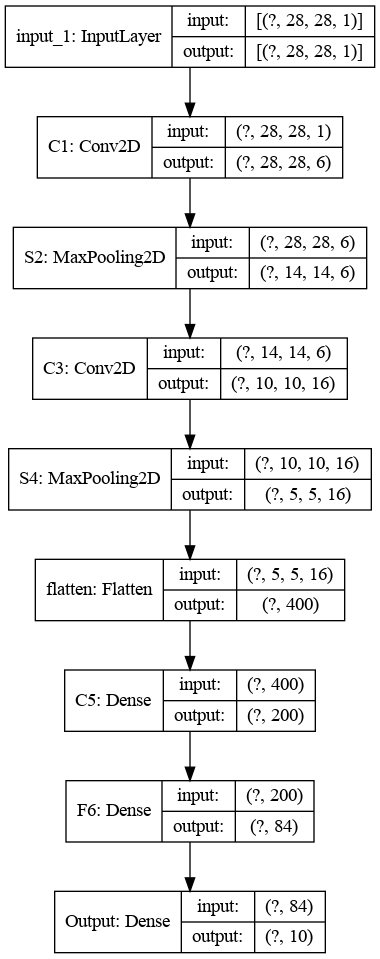

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Save the initial state of the network

You can save the initial state of the weights of the untrained network (random values) with the `Model.save_weights` method. <br>
This will be useful later to reset the network to its initial state before restarting other trainings:

In [17]:
import os

# Check whether the folder 'weights' exists and cretae it if needed:
if not os.path.isdir("weights"): os.mkdir("weights")

# Save the initial DNN (random) weights:
key = 'conv1_init'
model.save_weights(os.path.join('weights', key))

# Display the created files:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/conv1_init.data-00000-of-00001
weights/conv1_init.index


Note: the `save_weights` method uses the `key` argument to prefix the created files.<br>
When loading the NDD weights later with the `load_weights` method of the `Sequential` class, just give the same key to retrieve the relevant files.

## 3 - Train the network while measuring its performance at each *epoch*

If necessary, consult the documentation of the `fit` method on the page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

Complete the cell below to train the CNN with the `fit` method of the `model` object using the arguments:
- `x_train`: the 60000 images
- `y_train`: the 60000 *one-hot* encoded labels.
- `epochs=10`: repeat full training 10 times.
- `batch_size=64`: split the input data set (the 60000 images) into "batches" of size `batch_size` (here: batches of 64 images).<br>
Updating network weights is done after batches of `batch_size` images.<br>
The value of `batch_size` (by default: 32) is a parameter that influences the quality of the training but also its memory footprint: you can later try different values (64, 128, 256 ...) and observe how the quality of the training evolves).

Consulter au besoin la documentation de la méthode `fit` dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). 

Compléter la cellule ci-dessous pour entraîner le réseau en utilisant la méthode `fit` de l'objet `model` avec les arguments :
- `x_train` : les 60000 images 
- `y_train` : les 60000 labels encodés *one-hot*.
- `epochs=10` : faire 10 fois l'entraînement complet.
- `batch_size=64` : découper le jeu des données d'entrée (les 60000 images) en "lots" (*batch*) de taille `batch_size`.<br>
La mise à jour des poids du réseau est faite au bout de `batch_size` échantillons d'entrée. La valeur de `batch_size` (par défaut est 32) est un paramètre qui influe beaucoup sur la qualité de l'apprentissage : on peut essayer d'autres valeurs (64, 128 ...) et observer comment évoluent les performances d'entraînement).

To have a better indicator of the quality of the trained network, you can test at each `epoch` the precision of the inferences of the trained network using the test data: just pass the `validation_data` argument to the `fit` method, assigning it the test data tuple `(x_test, y_test)`:

In [18]:
# reload the initial state of the DNN
key = 'conv1_init'
model.load_weights(os.path.join('weights', key))

# set the seed of the random generators inolved by tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 batch_size=64,
                 epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2170 - accuracy: 0.9344 - val_loss: 0.0718 - val_accuracy: 0.9747
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.0441 - val_accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 59s 981us/sample - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0497 - val_accuracy: 0.9827
Epoch 4/10
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0407 - val_accuracy: 0.9870
Epoch 5/10
 9472/60000 [===>..........................] - ETA: 56s - loss: 0.0222 - accuracy: 0.9926

KeyboardInterrupt: 

L'objet `hist` retourné par la méthode `fit` possède un attribut `history` de type dictionnaire dont les clefs `'loss'`, `'accuracy'` contiennent l'évaluation de la fonction de cout et de la précision du réseau à la fin de chaque (*epoch*) avec les données d'entraînement. Les clefs `'val_loss'` et `'val_accuracy'` sont associées aux données de test.

In [14]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

[0.21696423487464586, 0.0671620869036764, 0.0480738176787893, 0.035711063631499805, 0.029277188995465015, 0.024913442396512255, 0.021330159932002424, 0.017623714281339197, 0.014794281720657212, 0.013530881385869968]
[0.93435, 0.97893333, 0.98475, 0.98866665, 0.9906667, 0.9917833, 0.993, 0.9942333, 0.9949833, 0.99556667]
[0.0717512615699321, 0.04411498111682013, 0.04974416529608425, 0.040749169454025104, 0.04098297928769607, 0.036207351581694094, 0.03913076518733869, 0.03531386979132367, 0.03837380193465578, 0.03247081030756362]
[0.9747, 0.9855, 0.9827, 0.987, 0.9864, 0.9879, 0.9877, 0.9884, 0.9885, 0.9906]


#### Tracé des courbes `accuracy` et `loss`  de l'entraînement et des test :

La fonction `plot_loss_accuracy` du module `utils.tools` (présent dans le répertoire du notebook) permet de tracer les courbes de précision et de perte en utilisant les données stockées dans l'objet `hist`. Faire tracer ces courbes :

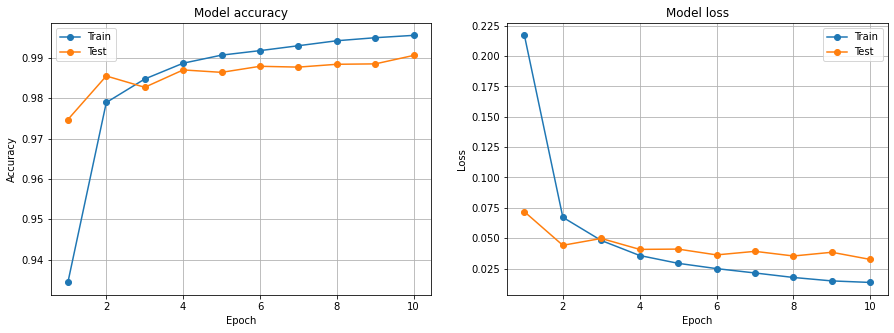

In [16]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

### Arrêter automatiquement l'entraînement avant *over-fit*

Keras propose des outils pour arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de `val_accuracy` ou la décroisance de `val_losss` d'une `epoch` à l'autre (cf le callback  [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).

On peut ainsi définir une liste de fonctions *callback* que l'on peut passer en argument à la fonction `fit` avec l'agument nommé  `callbacks` :

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks_list = [
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=2,              # accepter que 'val_accuracy' diminue 2 fois en tout
                  mode='max',              # arrêter si le paramètre décroît 
                  restore_best_weights=True,
                  verbose=1)
]

# recharger l'état initial du réseau:
key = 'conv1_init'
model.load_weights('weights/'+key)  

# fixer la graine des générateurs aléatoires utilisés par tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=15, 
                    batch_size=68, 
                    callbacks = callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1806 - accuracy: 0.9441 - val_loss: 0.0589 - val_accuracy: 0.9805
Epoch 2/15
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 3/15
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0506 - val_accuracy: 0.9846
Epoch 4/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0479 - val_accuracy: 0.9841
Epoch 00004: early stopping


Tracer les courbes `loss` et `accuracy` :

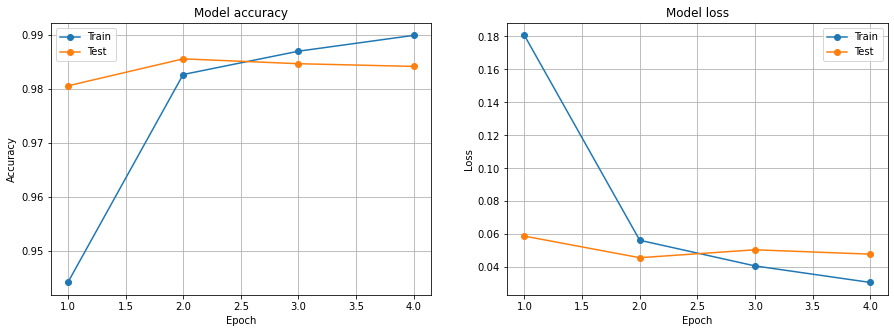

In [18]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

Le réseau convolutionnel tend vers une meilleure précision voisine de 99%.

### Sauvegarder les poids du  réseau entraîné

La méthode `save_weights` de la classe `Sequential`permet d'enregistrer les **poids** du réseau entraïné dans un fichier :

In [19]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("weights"): os.mkdir("weights")

# sauvegarde des poids du réseau entrainé:
key = 'conv1_trained'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/conv1_trained.data-00000-of-00001
weights/conv1_trained.index


### Sauvegarder la structure du réseau et ses poids

La méthode `save` de la classe `Sequential` permet d'enregistrer **toute la structure et les poids** du réseau entraïné dans un fichier.<br />
Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [20]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("models"): os.mkdir("models")

# sauvegarder structure réseau + poids :
key = 'conv1_trained'
model.save('models/'+key) 

# afficher les fichiers créés:
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith(key)]
for f in files: print(f)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/conv1_trained/assets
models/conv1_trained


## 4 - Exploiter le réseau entraîné : méthode `predict`

La méthode `predict` de l'objet `model` permet de calculer les inférences du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict` :

La méthode `predict` de l'objet `model` permet de calculer les inférences du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict`, et comment exploiter la représentation  *one-hot* renvoyée par `fit` en utilisant la méthode `argmax` des tableaux de numpy :

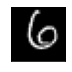

Inférence du réseau pour l'image n° 100 :
[7.1408766e-05 1.1179006e-06 1.8602432e-06 1.5572475e-07 1.4217694e-05
 2.3234420e-04 9.9964130e-01 6.2507546e-08 3.6841539e-05 5.6028324e-07]


In [21]:
i = 100  # numéro de l'image de test choisie

# afficher l'image :
from utils.tools import plot_images
plot_images(im_test,i,1,1) ; plt.show()

# inférence du réseau entrainé pour l'image choisie: 
rep = model.predict(x_test[i:i+1])      # Attention: x doit être un tableau de matrices...
                                        # => x[i] ne convient pas !

print(f"Inférence du réseau pour l'image n° {i} :\n{rep[0]}")

pour rendre plus lisible la sortie du réseau, on peut limiter à 2 chiffre après la virgule l'affichage du tableau numpy :

In [22]:
with np.printoptions(formatter={'float':'{:.2f}'.format}):    
    print(f"Inférence du réseau pour l'image n° {i} arrondie à 2 chiffre :\n{rep[0]}")

Inférence du réseau pour l'image n° 100 arrondie à 2 chiffre :
[0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


La méthode `argmax` des tableaux *ndarray* de *numpy* permet d'obtenir le rang de la valeur maximale :

In [23]:
print(f"Le label prédit par le réseau est rep[0].argmax() : {rep[0].argmax()}")
print(f"Le label associé à l'image choisie est lab_test[{i}] : {lab_test[i]}")

Le label prédit par le réseau est rep[0].argmax() : 6
Le label associé à l'image choisie est lab_test[100] : 6


### Utilité de la méthode `argmax` de numpy pour décoder le tableau de vecteurs *one-hot* renvoyé par la méthode `predict`

Quand on calcule une inférence du réseau `model` avec les images du tableau `x_test` par exemple, on obtient un résultat qui est un tableau de vecteurs *one-hot* :

In [24]:
results = model.predict(x_test)
print("forme du tableau 'results':", results.shape)
print("allure des vecteurs du tableau 'result' :")
with np.printoptions(formatter={'float':'{:.2f}'.format}): 
    print("results[0]  :", results[0])
    print("results[-1] :", results[-1])

forme du tableau 'results': (10000, 10)
allure des vecteurs du tableau 'result' :
results[0]  : [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
results[-1] : [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


Avec l'expression `results.argmax(axe=-1)`, on obtient le tableau des `argmax` de chaque vecteur $\leadsto$ c'est directement le tableau des chiffres reconnus par le réseau :

In [25]:
inferences = results.argmax(axis=-1)
print(f"inferences.shape: {inferences.shape}, inferences.dtype: {inferences.dtype}")
print(f"contenu du tableau inferences : {inferences}")

inferences.shape: (10000,), inferences.dtype: int64
contenu du tableau inferences : [7 2 1 ... 4 5 6]


On peut comparer le tableau `inférences` et le tableau `lab_test` avec l'operateur `==` (cela a un sens avec les tableaux *ndarray* du module *numpy*) :

In [26]:
inferences == lab_test

array([ True,  True,  True, ...,  True,  True,  True])

en comptant le nombre de `True` dans le résultat, on a directement le nombre d'inférences justes :

In [27]:
reponse_ok = (inferences == lab_test)
print(f"nombre de réponses justes : {reponse_ok.sum()} sur {nb_im_test} images de test")
precision = reponse_ok.sum()/nb_im_test*100
print(f"performance du réseau entraîné : {precision} % de réponses justes")

nombre de réponses justes : 9855 sur 10000 images de test
performance du réseau entraîné : 98.55000000000001 % de réponses justes


###  Afficher la matrice de confusion

In [28]:
from utils.tools import show_cm
help(show_cm)

Help on function show_cm in module utils.tools:

show_cm(true, results, classes)
    true  : the actual labels 
    results : the labels computed by the trained network)
    classes : list of possible label values



Faire afficher la matrice de confusion en lui passant les labels attendus `lab_test` et les labels calculés par le model :

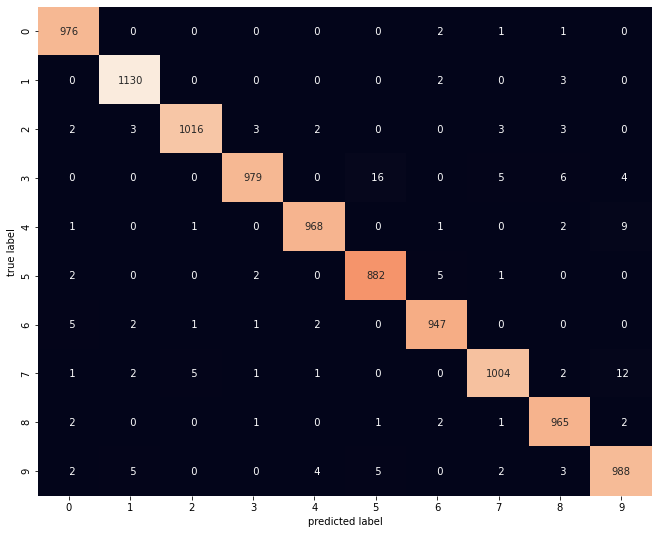

In [29]:
show_cm(lab_test, results, range(nb_classe))

# Autres ressources intéressantes... des vidéos :

In [30]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [31]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [32]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>